# **Week 8 - Simple Linear Regression**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.formula.api as smf

## **Exercise 5.1 Plastic film folding machine**

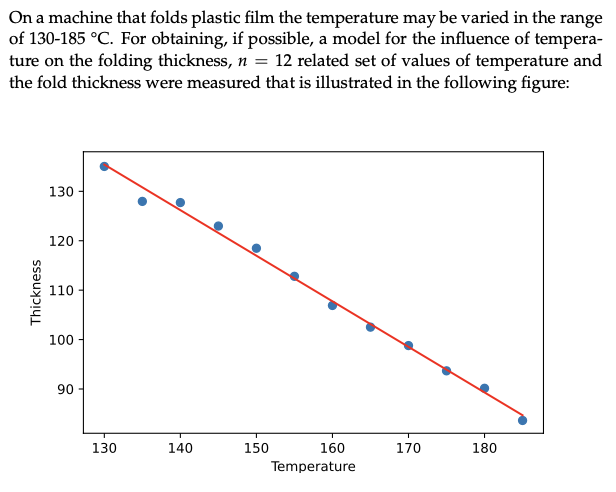

### **a) Which parameters?**

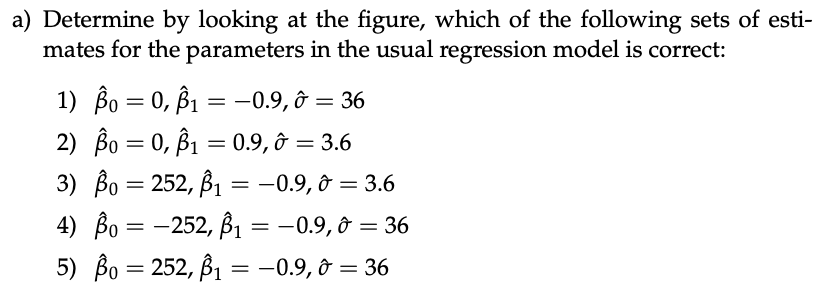

The intercept is higher than 0, so the only possible options are 3 and 5. Both of them have a negative slope, but since the points lie close to the estimated line, we choose the options with the smallest residual standard deviation, which is 3.6.

So option 3.

### **b) Choose correct**

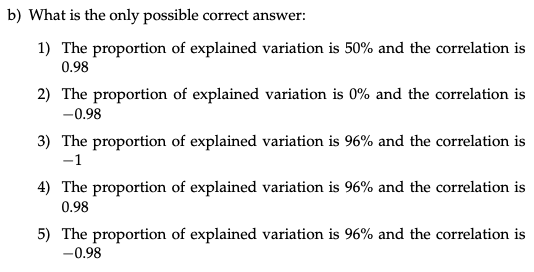

The explained variation must be very high and the correlation must be negative. We know that the explained variation is equal to the squared correlation, so:

Page 246:
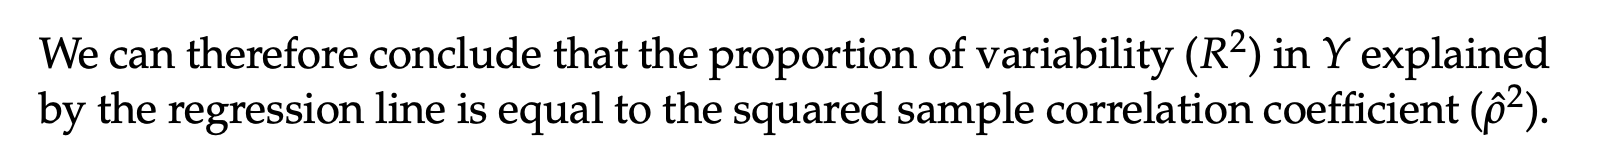

In [2]:
(-0.98)**2

0.9603999999999999

Option 5.

## **Exercise 5.2 Linear regression life time model**

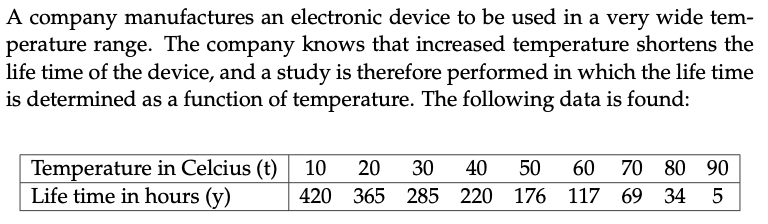

### **a) Calculate the 95% confidence interval for the slope**

We use method 5.15:

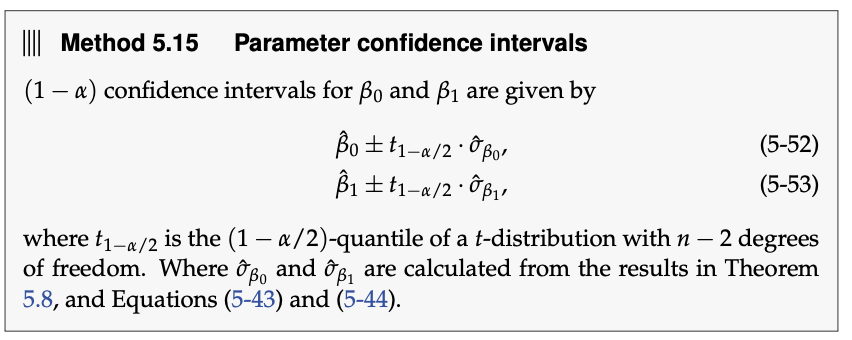

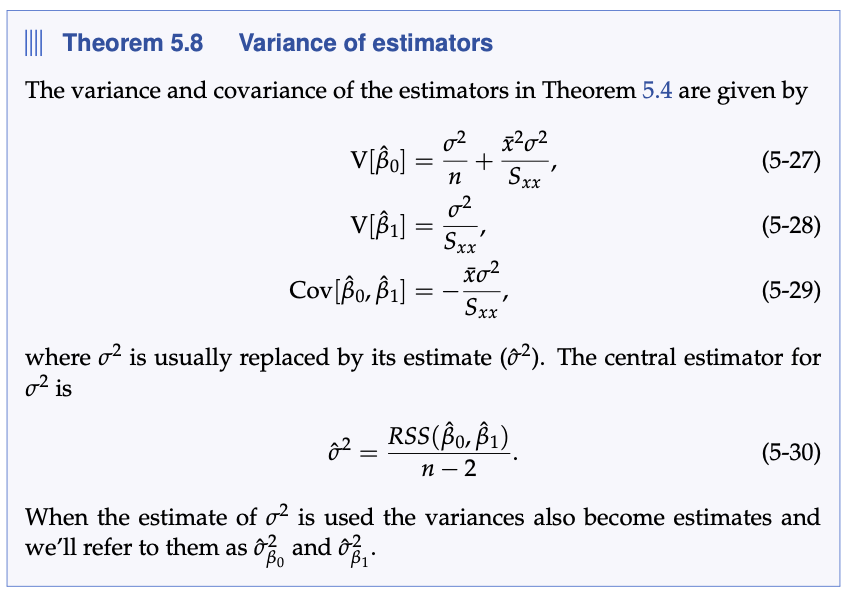

In [3]:
df = pd.DataFrame({'t': [10,20,30,40,50,60,70,80,90], 'y': [420,365,285,220,176,117,69,34,5]
})

In [4]:
# Sample size
n = len(df['t'])

# Step 1: Calculate the means of t and y
t_mean = df['t'].mean()
y_mean = df['y'].mean()

# Step 2: Estimate parameters β₁ (slope) and β₀ (intercept)
Sxx = np.sum((df['t'] - t_mean) ** 2)
beta1_hat = np.sum((df['y'] - y_mean) * (df['t'] - t_mean)) / Sxx
beta0_hat = y_mean - beta1_hat * t_mean

# Step 3: Calculate residuals and variance
residuals = df['y'] - (beta0_hat + beta1_hat * df['t'])
RSS = np.sum(residuals ** 2)
sigma2 = RSS / (n - 2)
sigma_beta1 = np.sqrt(sigma2 / Sxx)

# Step 4: Calculate the 95% confidence interval for β₁
confidence_interval = beta1_hat + np.array([-1, 1]) * stats.t.ppf(1 - 0.05/2, df=n-2) * sigma_beta1

print('Estimate for the slope (beta1):', beta1_hat)
print('Confidence interval:', confidence_interval)



Estimate for the slope (beta1): -5.3133333333333335
Confidence interval: [-5.91816122 -4.70850544]


or:

In [5]:
fit = smf.ols('y ~ t', data=df).fit()
print(fit.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
No. Observations:                   9   F-statistic:                     431.5
Covariance Type:            nonrobust   Prob (F-statistic):           1.51e-07
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    453.5556     14.394     31.511      0.000     419.520     487.591
t             -5.3133      0.256    -20.773      0.000      -5.918      -4.709

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [29]:
print(fit.mse_resid**(1/2))

0.5564719372521423


### **b) Can a relation between temperature and life time be documented on level 5%?**

Since the confidence interval does not include 0, it can be documented that there
is a relationship between life time and temperature. 

## **Exercise 5.3 Yield of chemical process**

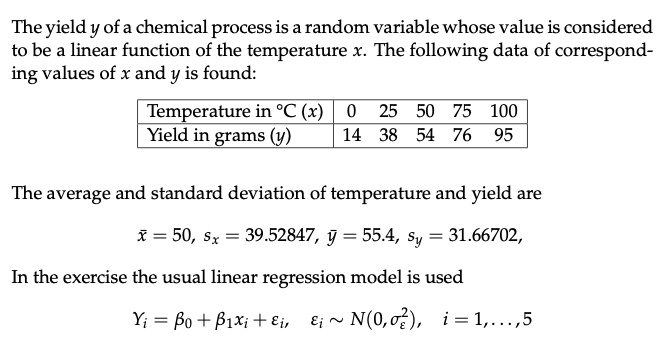

### **a) Can a significant relationship between yield and temperature be documented on the usual significance level α = 0.05?**

In [30]:
x = [0,25,50,75,100]
y = [14,38,54,76,95]
df = pd.DataFrame({'x': x, 'y': y})


fit = smf.ols('y ~ x', data=df).fit()
print(fit.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
No. Observations:                   5   F-statistic:                     1071.
Covariance Type:            nonrobust   Prob (F-statistic):           6.27e-05
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.4000      1.497     10.290      0.002      10.637      20.163
x              0.8000      0.024     32.733      0.000       0.722       0.878

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [31]:
print(fit.pvalues)

Intercept    0.001958
x            0.000063
dtype: float64


Since the p-value = 0.000063 is much smaller than 0.05, we can conclude there is a significant relationship between temp and yield.

### **b) Give the 95% confidence interval of the expected yield at a temperature of $x_{new}$ = 80° C.**

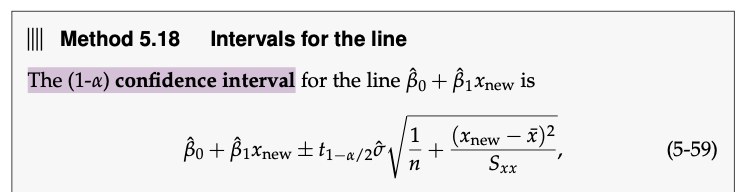

In [9]:
# Extract parameter estimates
beta0_hat = fit.params['Intercept']
beta1_hat = fit.params['x']
sigma = fit.mse_resid**(1/2)  # Residual standard deviation

# Define new x value
x_new = 80

# Calculate necessary statistics
x_bar = np.mean(x)
Sxx = np.sum((x - x_bar) ** 2)
n = len(x)

# Mean response at x_new
mean_response = beta0_hat + beta1_hat * x_new

# Calculate margin of error for 95% confidence interval
margin_of_error = stats.t.ppf(1 - 0.05 / 2, df=n - 2) * sigma * np.sqrt(1 / n + ((x_new - x_bar) ** 2) / Sxx)
confidence_interval = mean_response + np.array([-1, 1]) * margin_of_error

print('Mean response at x =', x_new, 'is', mean_response)
print('95% confidence interval:', confidence_interval)

Mean response at x = 80 is 79.4
95% confidence interval: [75.79347713 83.00652287]


In [10]:
#or using the predict method
print(fit.get_prediction(pd.DataFrame({'x': [80]})).summary_frame(alpha=0.05))

   mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  79.4  1.133255      75.793477      83.006523      72.27132      86.52868


### **c) What is the upper quartile of the residuals?**

In [11]:
np.quantile(fit.resid, [0.75])

array([0.6])

## **Exercise 5.4 Plastic material**

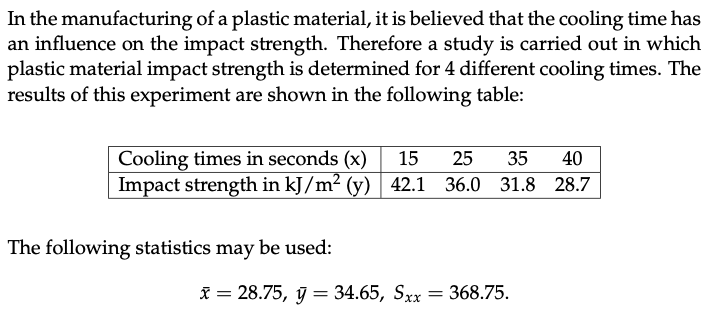

### **a) What is the 95% confidence interval for the slope of the regression model?**

In [37]:
x = [15, 25, 35, 40]
y = [42.1, 36.0, 31.8, 28.7]
df = pd.DataFrame({'x': x, 'y': y})
fit = smf.ols('y ~ x', data=df).fit()
print(fit.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
No. Observations:                   4   F-statistic:                     323.7
Covariance Type:            nonrobust   Prob (F-statistic):            0.00308
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.6390      0.878     56.513      0.000      45.860      53.418
x             -0.5214      0.029    -17.991      0.003      -0.646      -0.397

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [38]:
fit.conf_int(alpha=0.05)  # 95% C

,0,1
Intercept,45.859676,53.418291
x,-0.646041,-0.396671


In [39]:
conf_intervals = fit.conf_int(alpha=0.05)  # 95% CI by default
slope_conf_interval = conf_intervals.loc['x'].values  # Confidence interval for the slope (β₁)

# Print the results
print("95% confidence interval for the slope:", slope_conf_interval)

95% confidence interval for the slope: [-0.64604074 -0.39667112]


In [40]:
#or DIY:

# Sample size
n = len(x)

# Step 1: Calculate the means of x and y
x_mean = df['x'].mean()
y_mean = df['y'].mean()

# Step 2: Estimate parameters β₁ (slope) and β₀ (intercept)
Sxx = np.sum((df['x'] - x_mean) ** 2)
beta1_hat = np.sum((df['y'] - y_mean) * (df['x'] - x_mean)) / Sxx
beta0_hat = y_mean - beta1_hat * x_mean

# Step 3: Calculate residuals and variance
residuals = df['y'] - (beta0_hat + beta1_hat * df['x'])
RSS = np.sum(residuals ** 2)
sigma2 = RSS / (n - 2)
sigma_beta1 = np.sqrt(sigma2 / Sxx)

# Step 4: Calculate the 95% confidence interval for β₁
confidence_interval = beta1_hat + np.array([-1, 1]) * stats.t.ppf(1 - 0.05/2, df=n-2) * sigma_beta1

print('Estimate for the slope (beta1):', beta1_hat)
print('Confidence interval:', confidence_interval)

Estimate for the slope (beta1): -0.5213559322033898
Confidence interval: [-0.64604074 -0.39667112]


### **b) Can you conclude that there is a relation between the impact strength and the cooling time at significance level α = 5%?**

Since the CI doesnt contain 0, there is a significant relationship between them.

### **c) Range for t**

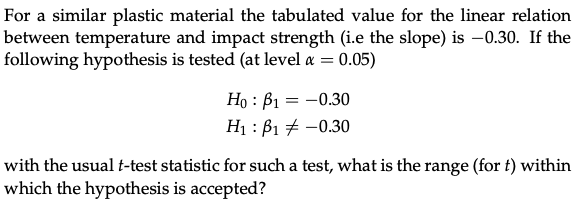

In [15]:
stats.t.ppf([0.05/2, 1-0.05/2],2)

array([-4.30265273,  4.30265273])

## **Exercise 5.5 Water polution**

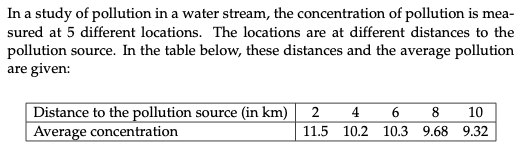

### **a) What are the parameter estimates for the three unknown parameters in the usual linear regression model: 1) The intercept (β0), 2) the slope (β1) and 3) error standard deviation (σ)?**

In [42]:

concentration = [11.5, 10.2, 10.3, 9.68, 9.32]
distance = [2, 4, 6, 8, 10]
df = pd.DataFrame({'concentration': concentration, 'distance': distance})
fit = smf.ols('concentration ~ distance', data=df).fit()

print(fit.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:          concentration   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.823
No. Observations:                   5   F-statistic:                     19.66
Covariance Type:            nonrobust   Prob (F-statistic):             0.0213
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.6640      0.365     31.955      0.000      10.502      12.826
distance      -0.2440      0.055     -4.434      0.021      -0.419      -0.069

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [44]:
fit.scale**(1/2)

0.34802298774650015

In [43]:
fit.mse_resid**(1/2)

0.34802298774650015

So:

$$\beta_0 = 11.6640$$
$$\beta_1 = -0.2440$$
$$\sigma = 0.348$$

In [18]:
#or manually

# Sample size
n = len(df['distance'])

# Step 1: Calculate the means of x and y
x_mean = df['distance'].mean()
y_mean = df['concentration'].mean()

# Step 2: Estimate parameters β₁ (slope) and β₀ (intercept)
Sxx = np.sum((df['distance'] - x_mean) ** 2)
beta1_hat = np.sum((df['concentration'] - y_mean) * (df['distance'] - x_mean)) / Sxx
beta0_hat = y_mean - beta1_hat * x_mean

# Step 3: Calculate residuals and variance
residuals = df['concentration'] - (beta0_hat + beta1_hat * df['distance'])
RSS = np.sum(residuals ** 2)
sigma2 = RSS / (n - 2)

print('Intercept:', beta0_hat)
print('Slope:', beta1_hat)
print('Residual standard error:', np.sqrt(sigma2))


Intercept: 11.663999999999998
Slope: -0.24399999999999994
Residual standard error: 0.34802298774649987


### **b) How large a part of the variation in concentration can be explained by the distance?**

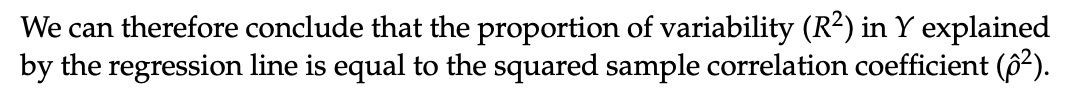

In [19]:
correlation = df.corr().loc['concentration', 'distance']
print('Correlation:', correlation)

print("Explained variance:", correlation ** 2)

Correlation: -0.9314605574246768
Explained variance: 0.8676187700378897


Its also in the fit summary.

### **c) What is a 95%-confidence interval for the expected pollution concentration 7 km from the pollution source?**

In [20]:
print(fit.get_prediction(pd.DataFrame({'distance':[7]})).summary_frame(alpha=0.05))

    mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  9.956  0.165082       9.430636      10.481364      8.730151     11.181849


## **Exercise 5.6 Membrane pressure drop**

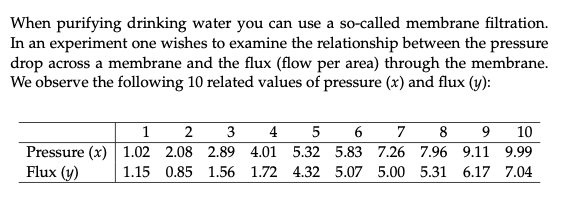

In [21]:
pressure = [1.02,2.08,2.89,4.01,5.32,5.83,7.26,7.96,9.11,9.99]
flux = [1.15,0.85,1.56,1.72,4.32,5.07,5.00,5.31,6.17,7.04]

df = pd.DataFrame({'pressure': pressure, 'flux': flux})


### **a) What is the empirical correlation between pressure and flux estimated to? Give also an interpretation of the correlation.**

In [22]:
print("Correlation coefficient:", df.corr().loc['pressure', 'flux'])

Correlation coefficient: 0.9638184397950359


### **b) What is a 90% confidence interval for the slope β1 in the usual regression model?**

In [23]:
fit = smf.ols('flux ~ pressure', data=df).fit()

In [24]:
conf_intervals = fit.conf_int(alpha=0.10) 
slope_conf_interval = conf_intervals.loc['pressure'].values  # Confidence interval for the slope (β₁)

# Print the results
print("95% confidence interval for the slope:", slope_conf_interval)

95% confidence interval for the slope: [0.59110941 0.85384259]


### **c) How large a part of the flux-variation is not explained by pressure differences?**

In [25]:
print("The amount of variation in the flux that is not explained by the pressure is", 1-fit.rsquared)

The amount of variation in the flux that is not explained by the pressure is 0.07105401511106291


### **d) Can you at significance level α = 0.05 reject the hypothesis that the line passes through (0, 0)?**

This is the same as testing:

$$H_0: \beta_0 = 0$$

The p-values from the fit come from testing $H_0$.

In [26]:
print(fit.pvalues)

Intercept    0.680697
pressure     0.000007
dtype: float64


So we cannot reject $H_0$.

### **e) CI at three different pressure levels**

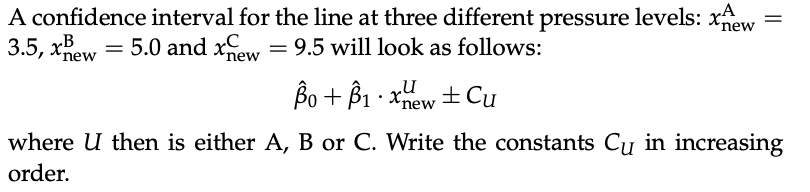

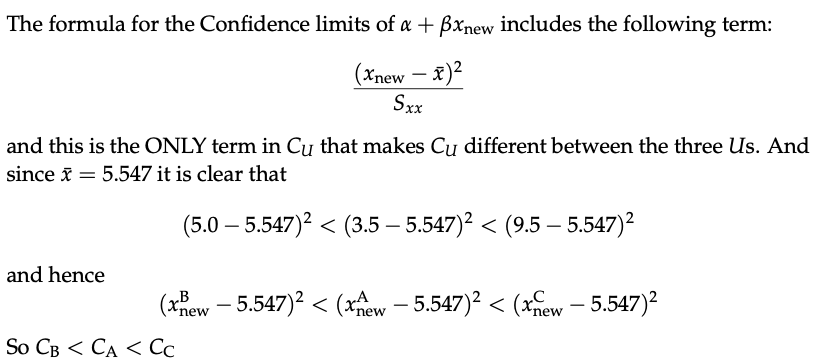

### Exercise II

A one-way ANOVA model has been fitted to some data from a balanced experiment (an equal number of observations for each treatment). The ANOVA table from the analysis is given below, where some numbers are replaced by letters.

| Source     | DF | SS  | MS   | Test Statistic | p-value |
|------------|----|------|------|----------------|---------|
| Treatment  | 9  | 207  | D    | E              | 0.03    |
| Residual   | 50 | B    | C    |                |         |
| Total      | A  | 707  |      |                |         |

**Question II.1 (3)**  

Which set of values is consistent with the ANOVA table?  

1  □ $ A = 59 $, $ B = 914 $, and $ D = 23 $  
2* □ $ A = 59 $, $ C = 10 $, and $ E = 2.3 $  
3  □ $ A = 450 $, $ D = 23 $, and $ E = 2.3 $  
4  □ $ B = 500 $, $ C = 23 $, and $ D = 10 $  
5  □ $ B = 914 $, $ C = 10 $, and $ E = 23 $  

**Facit**

Consider the following Table shown in Chapter 8

**ANOVA Table**

| **Source of Variation** | **Degrees of Freedom** | **Sums of Squares**       | **Mean Sum of Squares**                                                                                   | **Test Statistic $ F $**                                       | **p-value**                           |
|--------------------------|------------------------|---------------------------|-----------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------|---------------------------------------|
| Treatment               | $ k - 1 $           | $ SS(\text{Tr}) $       | $ MS(\text{Tr}) = \frac{SS(\text{Tr})}{k - 1} $                                                        | $ F_{\text{obs}} = \frac{MS(\text{Tr})}{MSE} $                | $ P(F > F_{\text{obs}}) $           |
| Residual                | $ n - k $           | $ SSE $                 | $ MSE = \frac{SSE}{n - k} $                                                                             |                                                                   |                                       |
| Total                   | $ n - 1 $           | $ SST $                 |                                                                                                           |                                                                   |                                       |

This structure outlines the ANOVA decomposition for balanced data. It includes the degrees of freedom (DF), sums of squares (SS), mean sums of squares (MS), F-test statistic, and the p-value.


The missing values are calculated as  

$A = 50 + 9 = 59, $ <br>
$B = 707 - 207 = 500, $ <br>
$C = \frac{B}{50} = \frac{500}{50} = 10$, <br>
$D = \frac{207}{9} = 23,$ <br> 
$E = \frac{D}{C} = \frac{23}{10} = 2.3$
  

Therefore, answer 2 is correct.

**Question II.2 (4)**

Two specific treatments are then compared in the post hoc analysis. What is the least significant difference between the two treatment means using a 5% significance level?  

1 □ 2.841  
2 □ 3.060  
3 □ 3.199  
4* □ 3.667  
5 □ 4.130  


### Facit

The formula from remark 8.13 is used:

$
LSD_\alpha = t_{1-\alpha/2}(n-k)\sqrt{\frac{2 \cdot MSE}{m}}.
$

Since there are \(n = 60\) observations across the \(k = 10\) treatments and the experiment is balanced, there are \(m = 6\) observations for each treatment. Thus,

$
LSD_{0.05} = t_{0.975}(50)\sqrt{\frac{2 \cdot 10}{6}} = 3.667,
$

which means answer 4 is correct.

### Question IV.2 (11)

What is the result of the first backward selection step on the model when using a significance
level α = 0.05 (both the conclusion and the argument must be correct)?

1* □ Humid should be removed, since 0.771 > 0.580 > 0.05

2 □ Windspeed should be removed, since it has the highest uncertainty (not counting Intercept)

3 □ Windspeed and Temperature should be removed, since 0.00011 < 0.05 and 0.021 < 0.05

4 □ Humid and Cloudcover should be removed, since 0.771 > 0.05 and 0.580 > 0.05

5 □ None of the variables should be removed, since the t values are all numerically greater
than tcrit = 2.003

### Facit
In a backward selection step in-significant inputs, i.e. with a p-value above the significance
level (0.05), one removes the variable with the highest p-value, but only one variable shall be
removed in a single step

### Question IV.3 (12)

Disregarding any conclusion about a potential model reduction, which of the following conclusions can be drawn for the market at the particular period with the estimated result

1 □ The estimate of the mean price in the period is 0.4419

2 □ When the temperature increases, the price decreases, and when the wind speed increases,
the price increases

3 □ The 99% prediction interval for the mean price has the width 2 · 0.111

4 □ The model can be used to predict the mean value of the wind speed in the period

5* □ The model can explain 37.6% of the observed variation in the price in the period

### Facit
The Multiple R-squared: measured the explained variation by the model.
